In [74]:
!gdown 1YAQHOBSmpDfwYeFq1dMQv94DyYPkp7Xc

Downloading...
From: https://drive.google.com/uc?id=1YAQHOBSmpDfwYeFq1dMQv94DyYPkp7Xc
To: C:\Users\Artan\alzheimer.csv

  0%|          | 0.00/2.38M [00:00<?, ?B/s]
 66%|######6   | 1.57M/2.38M [00:00<00:00, 11.7MB/s]
100%|##########| 2.38M/2.38M [00:00<00:00, 11.8MB/s]


In [124]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.model_selection import GridSearchCV, train_test_split 
from xgboost import XGBClassifier, XGBRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import missingno as msno
import matplotlib.pyplot as plt

In [76]:
df = pd.read_csv("alzheimer.csv")

In [77]:
df

,PatientID,Domain,Age,BMI,HeartRate,BloodPressure,Cholesterol,CognitiveTestScore,StressMobilityTestScore,RiskLevel,FamilyHistoryDementia,TreatmentResponse
0,P000001,Orthopedics,62.0,28.09,69.0,115.0,206.0,82.78,59.68,High Risk,No,Stable
1,P000002,Orthopedics,19.0,22.83,78.0,116.0,196.0,76.00,60.13,Low Risk,No,Improved
2,P000003,Pediatrics,18.0,27.40,71.0,116.0,200.0,58.52,68.76,Low Risk,Yes,Deteriorated
3,P000004,Pediatrics,47.0,27.81,78.0,105.0,176.0,83.56,70.71,Medium Risk,Yes,Improved
4,P000005,Neurology,38.0,17.92,69.0,113.0,208.0,74.45,76.36,High Risk,No,Stable
...,...,...,...,...,...,...,...,...,...,...,...,...
29995,P029996,Cardiology,30.0,29.28,65.0,138.0,286.0,80.59,81.70,Medium Risk,No,Improved
29996,P029997,Orthopedics,42.0,34.00,68.0,117.0,190.0,62.90,69.58,Low Risk,No,Improved
29997,P029998,Pediatrics,69.0,22.87,59.0,107.0,212.0,82.72,50.81,Low Risk,No,Stable
29998,P029999,Pediatrics,42.0,29.74,74.0,115.0,191.0,74.63,63.08,High Risk,No,Improved


# IMPUTATIONS

In [78]:
df.isnull().sum()

PatientID                    0
Domain                     200
Age                        200
BMI                        200
HeartRate                   50
BloodPressure              200
Cholesterol                200
CognitiveTestScore          50
StressMobilityTestScore    200
RiskLevel                    0
FamilyHistoryDementia        0
TreatmentResponse            0
dtype: int64

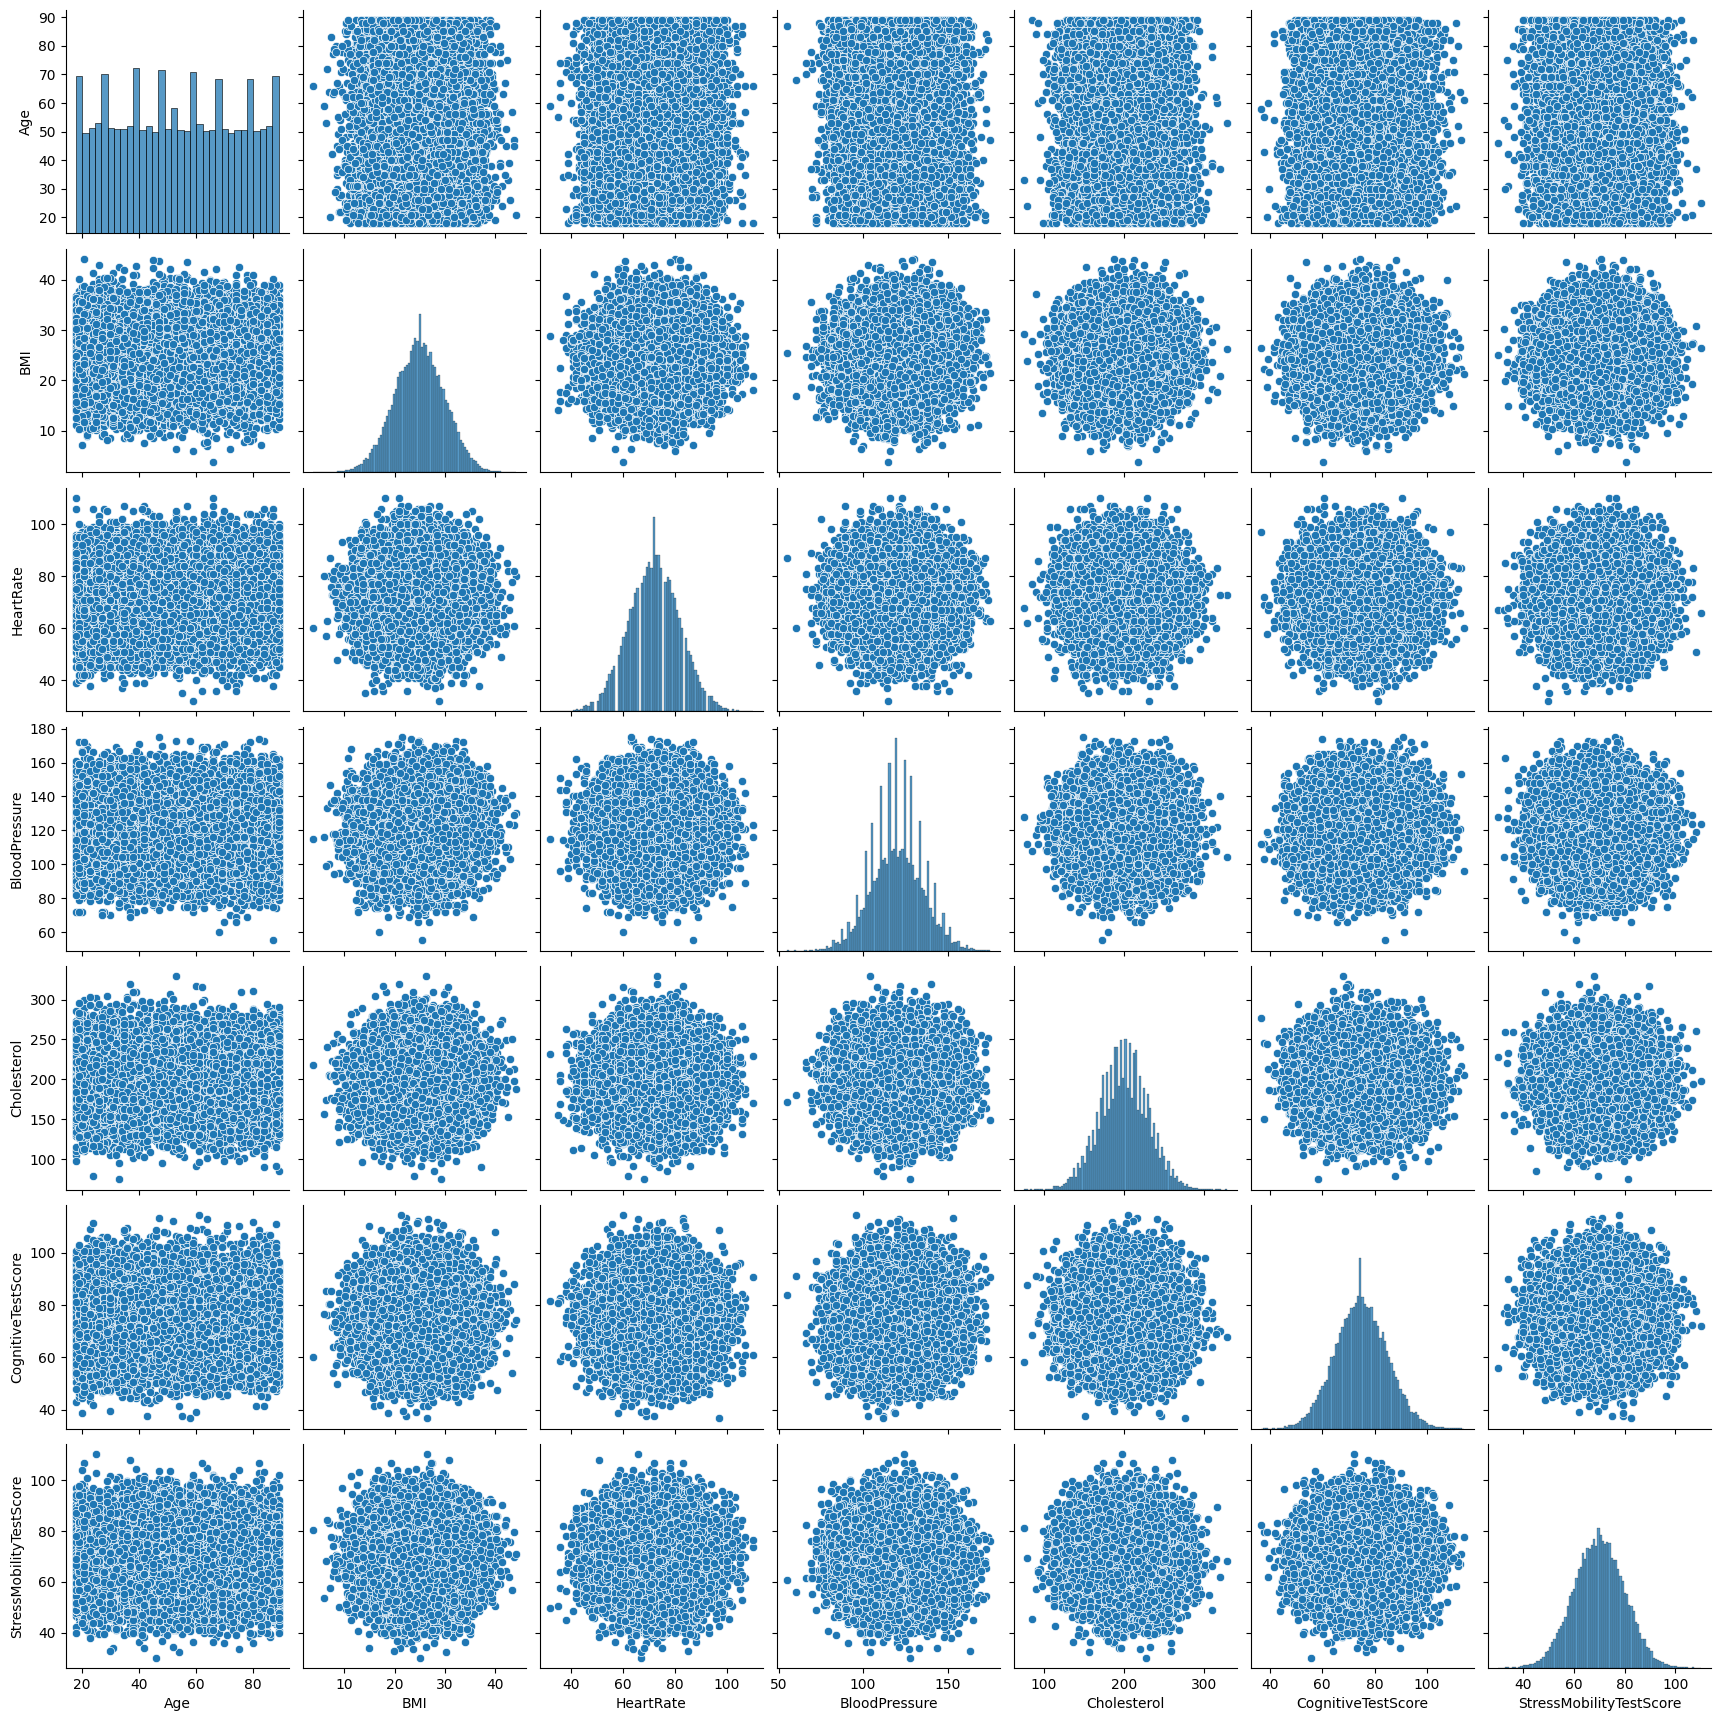

In [79]:
sns.pairplot(df)

<Axes: >

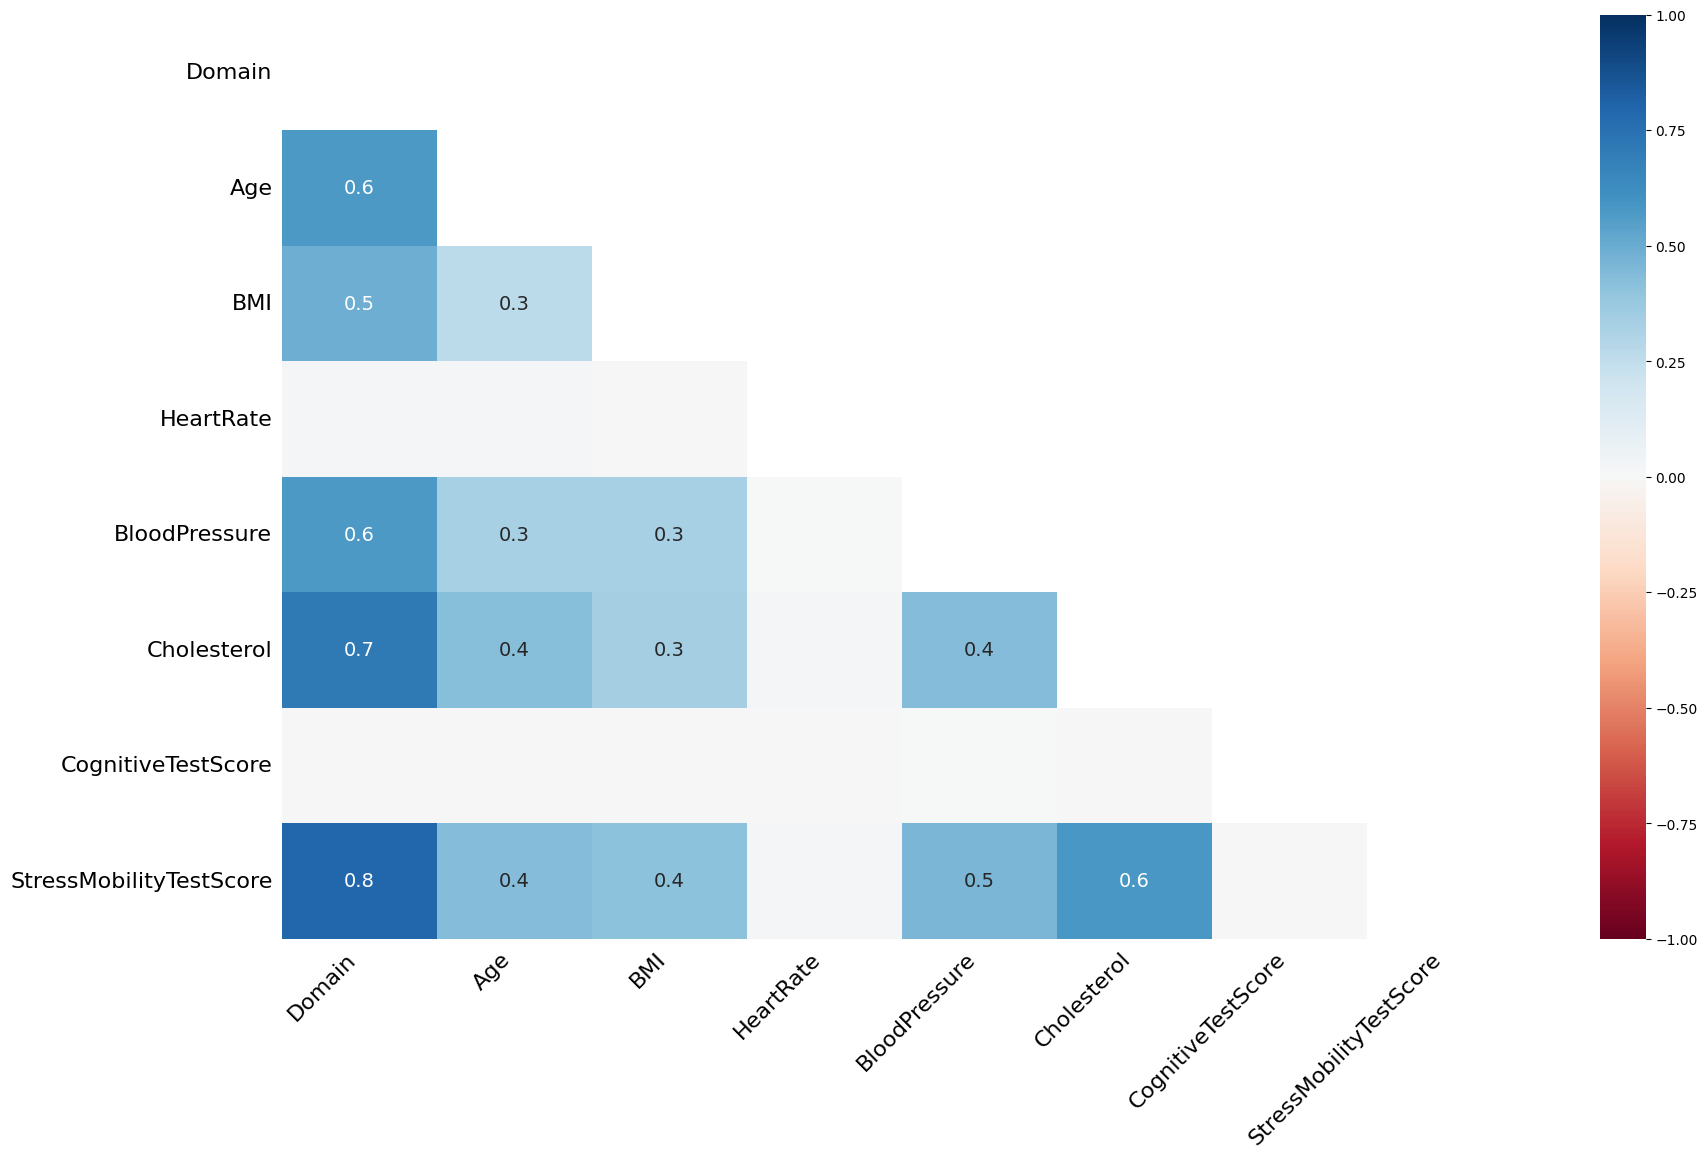

In [80]:
msno.heatmap(df)

In [81]:
to_impute = ['Domain', 'Age', 'BMI', 'BloodPressure', 'Cholesterol', 'StressMobilityTestScore']

encoder = OrdinalEncoder()
df[to_impute] = encoder.fit_transform(df[to_impute])
# imputing just to use MICE because of missingness correlation

In [82]:
df

,PatientID,Domain,Age,BMI,HeartRate,BloodPressure,Cholesterol,CognitiveTestScore,StressMobilityTestScore,RiskLevel,FamilyHistoryDementia,TreatmentResponse
0,P000001,3.0,44.0,1677.0,69.0,48.0,112.0,82.78,1380.0,High Risk,No,Stable
1,P000002,3.0,1.0,1151.0,78.0,49.0,102.0,76.00,1425.0,Low Risk,No,Improved
2,P000003,4.0,0.0,1608.0,71.0,49.0,106.0,58.52,2288.0,Low Risk,Yes,Deteriorated
3,P000004,4.0,29.0,1649.0,78.0,38.0,82.0,83.56,2483.0,Medium Risk,Yes,Improved
4,P000005,2.0,20.0,660.0,69.0,46.0,114.0,74.45,3048.0,High Risk,No,Stable
...,...,...,...,...,...,...,...,...,...,...,...,...
29995,P029996,0.0,12.0,1796.0,65.0,71.0,192.0,80.59,3582.0,Medium Risk,No,Improved
29996,P029997,3.0,24.0,2268.0,68.0,50.0,96.0,62.90,2370.0,Low Risk,No,Improved
29997,P029998,4.0,51.0,1155.0,59.0,40.0,118.0,82.72,527.0,Low Risk,No,Stable
29998,P029999,4.0,24.0,1842.0,74.0,48.0,97.0,74.63,1720.0,High Risk,No,Improved


In [83]:
mice = IterativeImputer()

df[to_impute] = mice.fit_transform(df[to_impute]).round().astype(float)

In [84]:
df.isnull().sum()

PatientID                   0
Domain                      0
Age                         0
BMI                         0
HeartRate                  50
BloodPressure               0
Cholesterol                 0
CognitiveTestScore         50
StressMobilityTestScore     0
RiskLevel                   0
FamilyHistoryDementia       0
TreatmentResponse           0
dtype: int64

In [85]:
df[to_impute] = encoder.inverse_transform(df[to_impute])

In [86]:
df.isnull().sum()

PatientID                   0
Domain                      0
Age                         0
BMI                         0
HeartRate                  50
BloodPressure               0
Cholesterol                 0
CognitiveTestScore         50
StressMobilityTestScore     0
RiskLevel                   0
FamilyHistoryDementia       0
TreatmentResponse           0
dtype: int64

<Axes: >

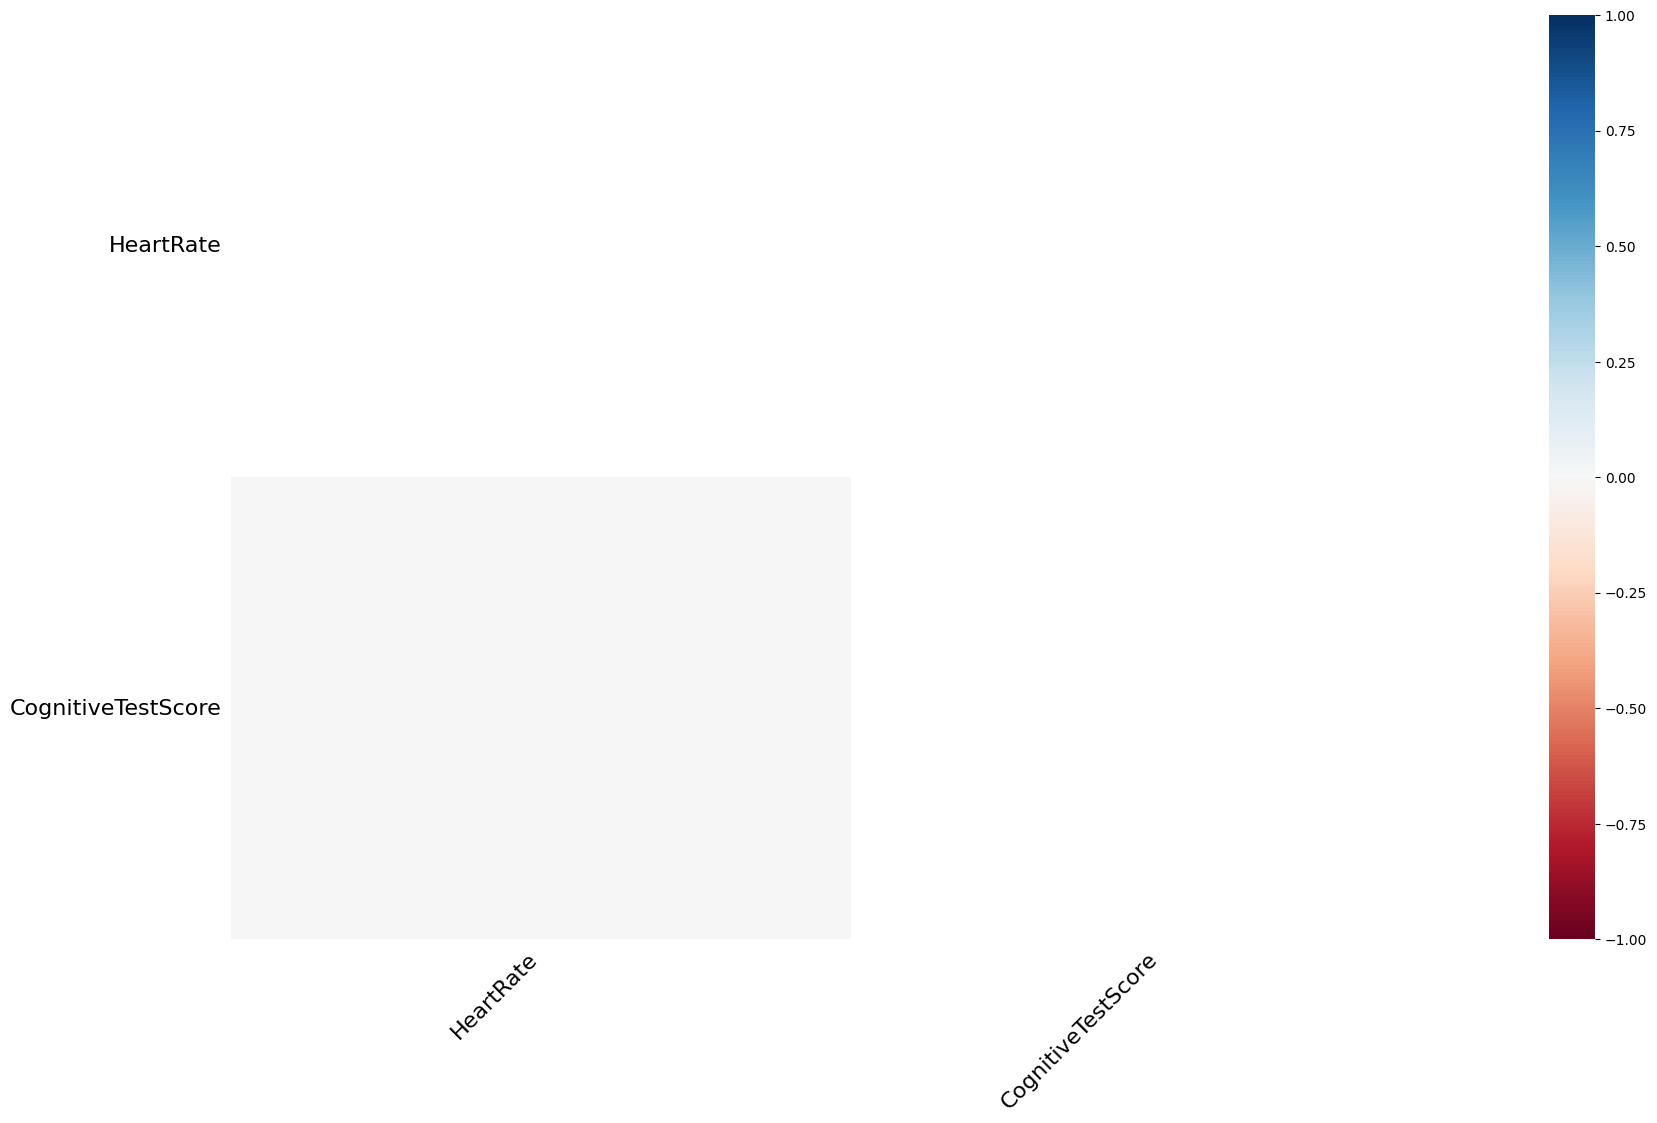

In [87]:
msno.heatmap(df)

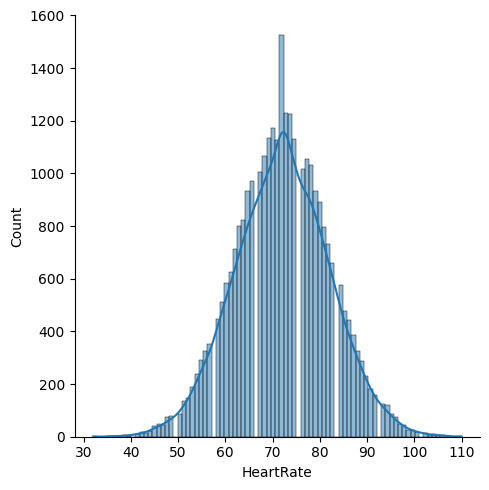

In [88]:
sns.displot(df['HeartRate'], kde = True)

In [89]:
df['HeartRate'] = df['HeartRate'].fillna(value=df['HeartRate'].mean())

In [90]:
df.isnull().sum()

PatientID                   0
Domain                      0
Age                         0
BMI                         0
HeartRate                   0
BloodPressure               0
Cholesterol                 0
CognitiveTestScore         50
StressMobilityTestScore     0
RiskLevel                   0
FamilyHistoryDementia       0
TreatmentResponse           0
dtype: int64

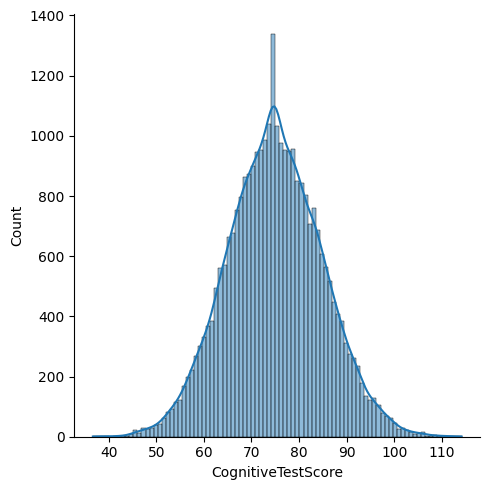

In [91]:
sns.displot(df['CognitiveTestScore'], kde = True)

In [92]:
df['CognitiveTestScore'] = df['CognitiveTestScore'].fillna(value=df['CognitiveTestScore'].mean())

In [93]:
df.drop(columns='PatientID', axis=1, inplace=True)

In [94]:
set(df['Domain']) # will impute with label encoder because there is no other logical way

{'Cardiology', 'Dermatology', 'Neurology', 'Orthopedics', 'Pediatrics'}

In [95]:
label = LabelEncoder()
df['Domain'] = label.fit_transform(df['Domain'])

In [96]:
df['RiskLevel'] = encoder.fit_transform(df[['RiskLevel']]) # clearly order in the features values

In [97]:
df = pd.get_dummies(df, columns=['FamilyHistoryDementia'])

In [98]:
df

,Domain,Age,BMI,HeartRate,BloodPressure,Cholesterol,CognitiveTestScore,StressMobilityTestScore,RiskLevel,TreatmentResponse,FamilyHistoryDementia_No,FamilyHistoryDementia_Yes
0,3,62.0,28.09,69.0,115.0,206.0,82.78,59.68,0.0,Stable,True,False
1,3,19.0,22.83,78.0,116.0,196.0,76.00,60.13,1.0,Improved,True,False
2,4,18.0,27.4,71.0,116.0,200.0,58.52,68.76,1.0,Deteriorated,False,True
3,4,47.0,27.81,78.0,105.0,176.0,83.56,70.71,2.0,Improved,False,True
4,2,38.0,17.92,69.0,113.0,208.0,74.45,76.36,0.0,Stable,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0,30.0,29.28,65.0,138.0,286.0,80.59,81.7,2.0,Improved,True,False
29996,3,42.0,34.0,68.0,117.0,190.0,62.90,69.58,1.0,Improved,True,False
29997,4,69.0,22.87,59.0,107.0,212.0,82.72,50.81,1.0,Stable,True,False
29998,4,42.0,29.74,74.0,115.0,191.0,74.63,63.08,0.0,Improved,True,False


In [105]:
df = df.replace(True, 1).replace(False, 0)

In [106]:
set(df['TreatmentResponse'])

{0.0, 1.0, 2.0}

In [107]:
df['TreatmentResponse'] = encoder.fit_transform(df[['TreatmentResponse']])

In [108]:
df

,Domain,Age,BMI,HeartRate,BloodPressure,Cholesterol,CognitiveTestScore,StressMobilityTestScore,RiskLevel,TreatmentResponse,FamilyHistoryDementia_No,FamilyHistoryDementia_Yes
0,3,62.0,28.09,69.0,115.0,206.0,82.78,59.68,0.0,2.0,1,0
1,3,19.0,22.83,78.0,116.0,196.0,76.00,60.13,1.0,1.0,1,0
2,4,18.0,27.4,71.0,116.0,200.0,58.52,68.76,1.0,0.0,0,1
3,4,47.0,27.81,78.0,105.0,176.0,83.56,70.71,2.0,1.0,0,1
4,2,38.0,17.92,69.0,113.0,208.0,74.45,76.36,0.0,2.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0,30.0,29.28,65.0,138.0,286.0,80.59,81.7,2.0,1.0,1,0
29996,3,42.0,34.0,68.0,117.0,190.0,62.90,69.58,1.0,1.0,1,0
29997,4,69.0,22.87,59.0,107.0,212.0,82.72,50.81,1.0,2.0,1,0
29998,4,42.0,29.74,74.0,115.0,191.0,74.63,63.08,0.0,1.0,1,0


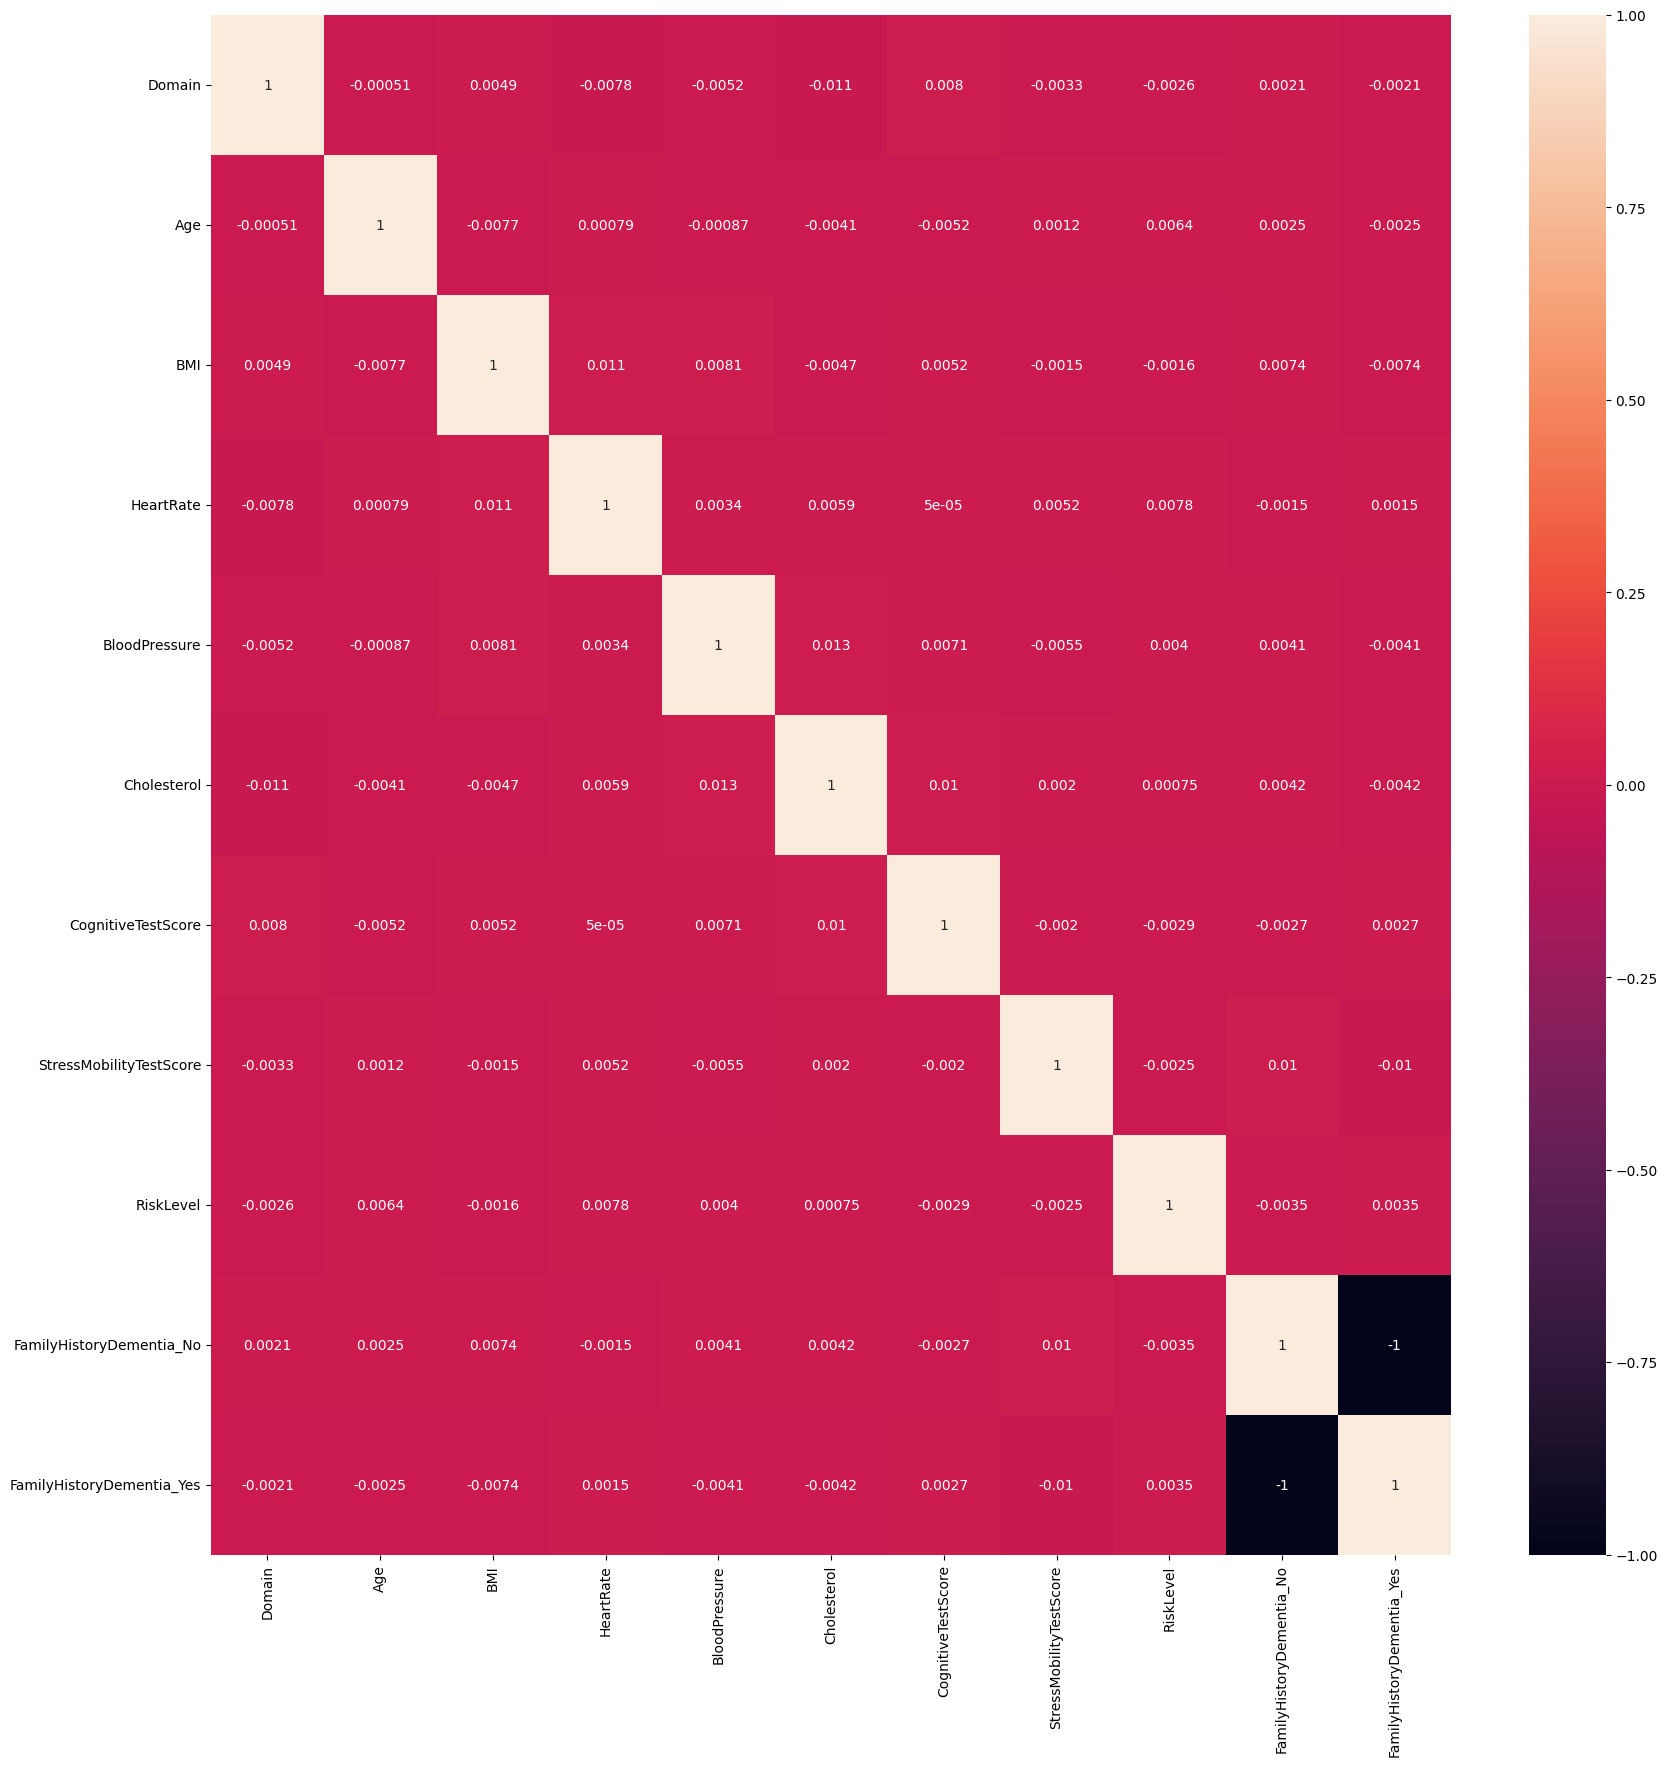

In [138]:
plt.figure(figsize=(20,20))
sns.heatmap(df.drop(columns='TreatmentResponse', axis = 1).corr(), annot = True)
plt.show()

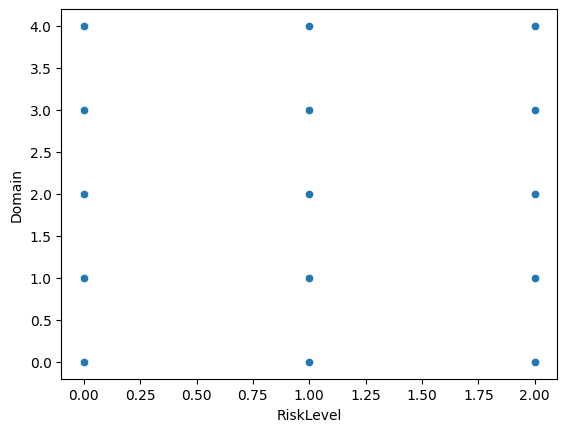

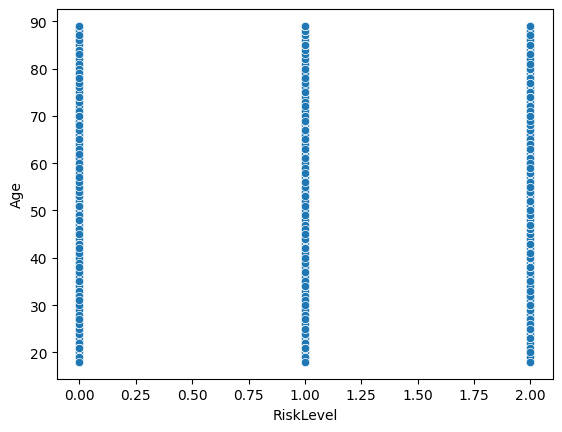

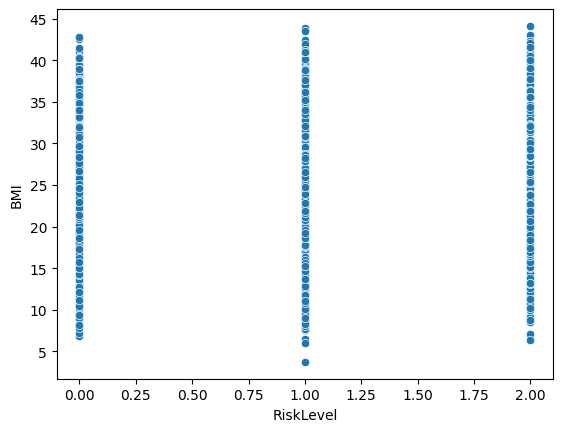

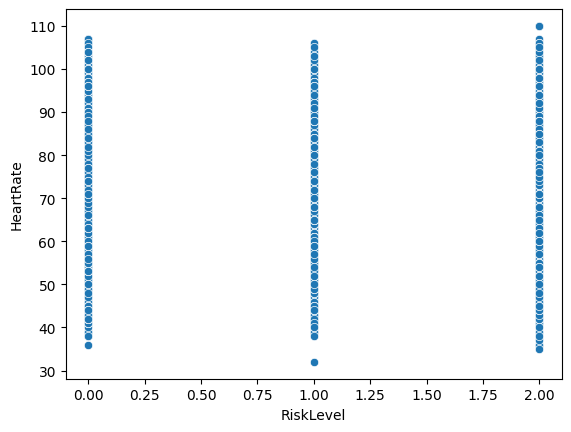

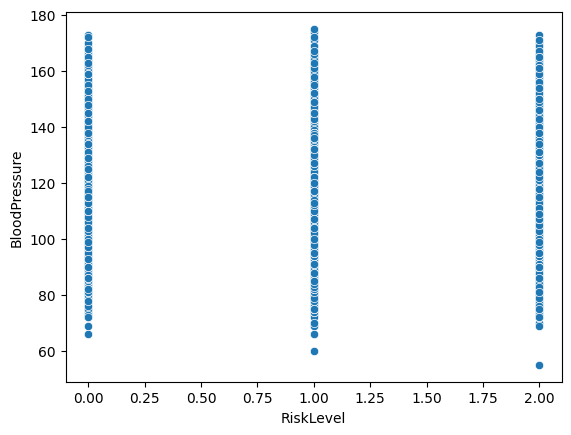

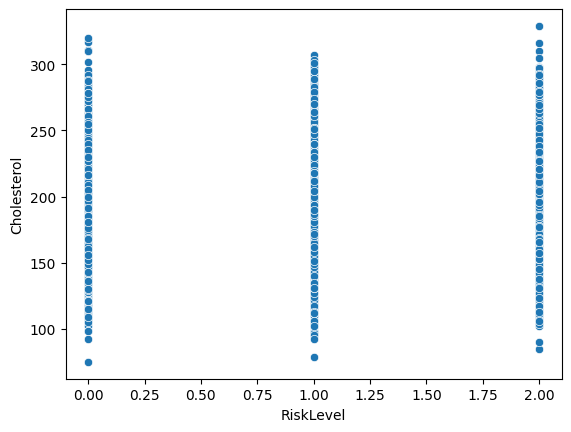

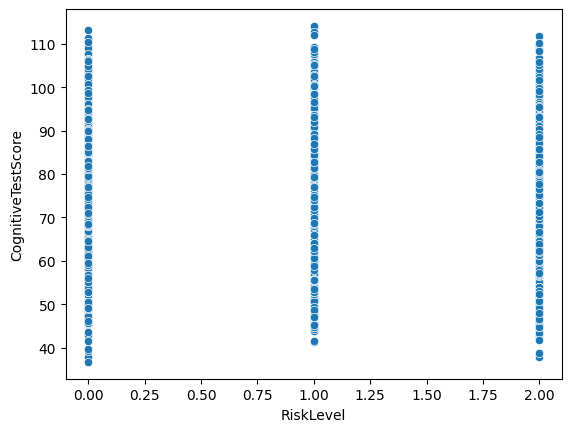

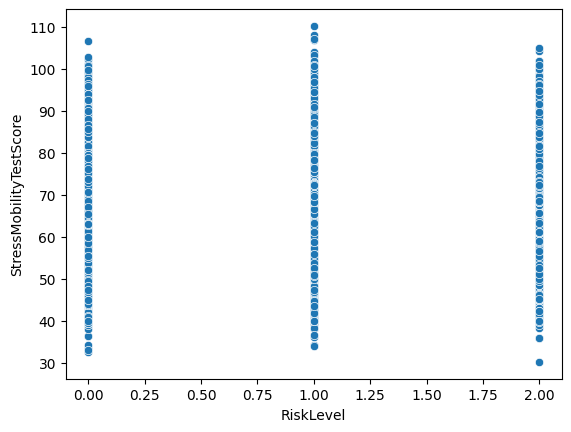

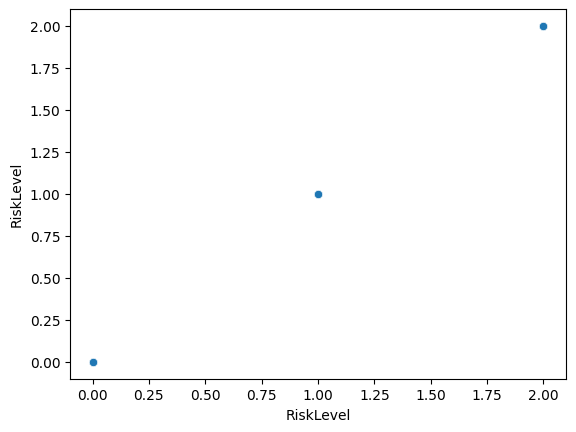

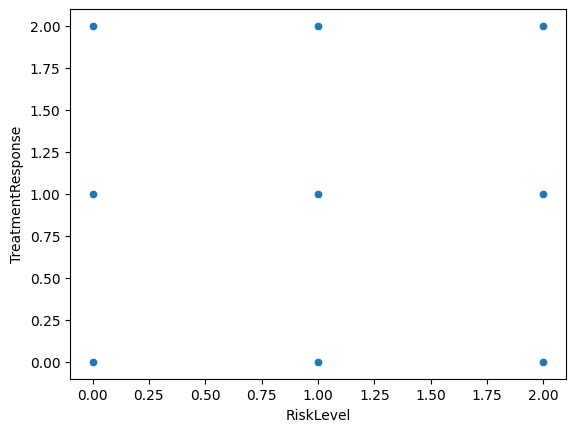

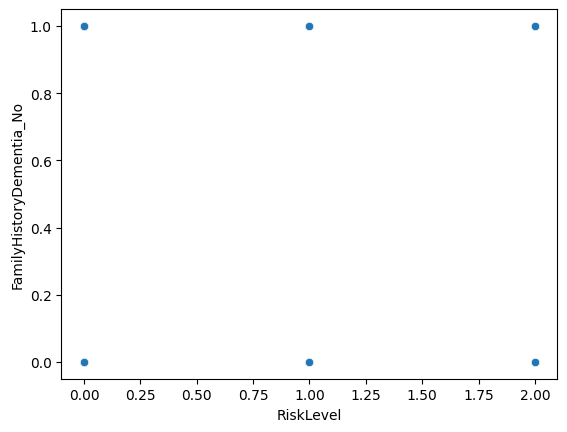

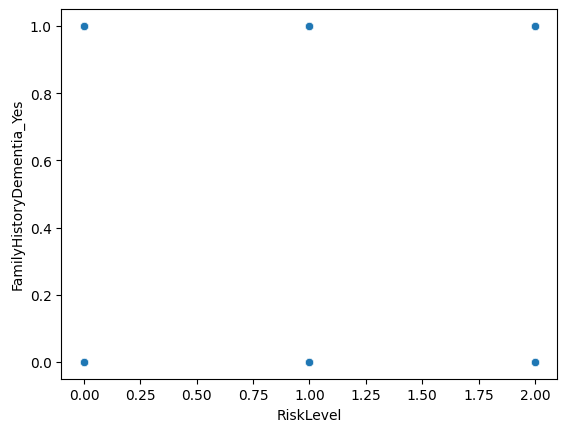

In [151]:
for col in df.columns:
    sns.scatterplot(data=df, x = 'RiskLevel', y = col)
    plt.show()

In [117]:
# linear, features not correlated between eachother, classification - multiclass

In [118]:
df['TreatmentResponse'].value_counts()

TreatmentResponse
2.0    12165
1.0    11805
0.0     6030
Name: count, dtype: int64

In [119]:
# and an unbalanced dataset

In [139]:
# best model choice would be a RandomForestClassifier, because it can handle non-linear (and of course it can handle linear) 
# it can capture relationships between features and handles good an unbalanced dataset

from sklearn.metrics import classification_report, f1_score, accuracy_score
from sklearn.linear_model import LogisticRegression
minmax = MinMaxScaler()
x, y = df.drop(columns='TreatmentResponse', axis = 1), df['TreatmentResponse']
trainX, testX, trainY, testY = train_test_split(x,y,test_size=0.2, random_state=1)

In [140]:
model = RandomForestClassifier(n_estimators=100, max_depth=5)  
model.fit((trainX), trainY)
pred_y = model.predict((testX))

print(classification_report(testY, pred_y))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      1211
         1.0       0.39      0.43      0.41      2324
         2.0       0.41      0.57      0.48      2465

    accuracy                           0.40      6000
   macro avg       0.27      0.33      0.29      6000
weighted avg       0.32      0.40      0.35      6000



C:\Users\Artan\miniconda3\envs\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Artan\miniconda3\envs\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Artan\miniconda3\envs\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [146]:
model = XGBClassifier(objective='multi:softmax') 
for col in trainX.columns:
    trainX[col] = pd.to_numeric(trainX[col], errors='coerce')
    testX[col] = pd.to_numeric(testX[col], errors='coerce')
model.fit((trainX), trainY)
pred_y = model.predict((testX))

print(classification_report(testY, pred_y))

              precision    recall  f1-score   support

         0.0       0.21      0.03      0.05      1211
         1.0       0.39      0.50      0.44      2324
         2.0       0.42      0.50      0.46      2465

    accuracy                           0.40      6000
   macro avg       0.34      0.34      0.31      6000
weighted avg       0.37      0.40      0.37      6000



In [150]:
estimator = RandomForestClassifier()

params = {
    'n_estimators': [10, 50, 100, 150],
    'min_samples_leaf': [5, 8, 11],
    'max_depth': [10, 50, 70, 100]
}

gc = GridSearchCV(
    estimator = estimator,
    param_grid=params,
    cv=5
)

gc.fit(x, y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 50, 70, 100],
                         'min_samples_leaf': [5, 8, 11],
                         'n_estimators': [10, 50, 100, 150]})

In [152]:
gc.best_score_

np.float64(0.4110666666666667)

In [153]:
gc.best_params_

{'max_depth': 50, 'min_samples_leaf': 11, 'n_estimators': 150}

In [156]:
import os 
print(os.cpu_coun)

AttributeError: 'builtin_function_or_method' object has no attribute 'number'